In [1]:
import numpy as np 
import pandas as pd 
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
book=pd.read_csv("D://project email identification//emailsP72.txt",error_bad_lines=False)
book

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [3]:
book.columns

Index(['Unnamed: 0', 'filename', 'Message-ID', 'content', 'Class'], dtype='object')

In [4]:
bd=book.drop(['Unnamed: 0', 'filename','Message-ID'], axis=1)

In [5]:
bd.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
bd['Class'] = encoder.fit_transform(bd['Class'])

In [8]:
bd.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [9]:
#Shape of data
bd.shape

(48076, 2)

In [10]:
#to check for null values
bd.isnull().sum()

content    0
Class      0
dtype: int64

In [11]:
#To check for duplicates and remove them :
bd.drop_duplicates(inplace=True)
print(bd.shape)

(24656, 2)


In [12]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24656 entries, 0 to 47981
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  24656 non-null  object
 1   Class    24656 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 481.6+ KB


In [13]:
bd['Class'].value_counts()

1    23014
0     1642
Name: Class, dtype: int64

# EDA

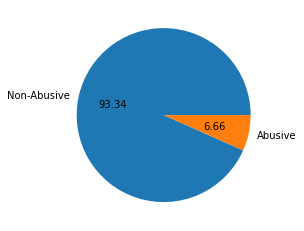

In [14]:
import matplotlib.pyplot as plt
plt.pie(bd['Class'].value_counts(), labels=['Non-Abusive','Abusive'],autopct="%0.2f")
plt.show()

Data is imbalanced

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\AMAN
[nltk_data]     SRIVASTAVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
#number of character in the content of a mail
bd['num_characters'] = bd['content'].apply(len)

In [18]:
bd.head()

,content,Class,num_characters
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [19]:
#number of words in the content of a mail
bd['num_words'] = bd['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
bd.head()

,content,Class,num_characters,num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [21]:
#number of sentences in the content of a mail
bd['num_sentences'] = bd['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
bd.head()

,content,Class,num_characters,num_words,num_sentences
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [23]:
bd[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.356789,12.570409
std,5394.644531,818.237457,26.921471
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [24]:
#non-abusive
bd[bd['Class'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.189580,12.257539
std,5532.160062,832.111557,26.480239
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [25]:
#abusive
bd[bd['Class'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.700365,16.955542
std,2834.633786,590.602208,32.171859
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

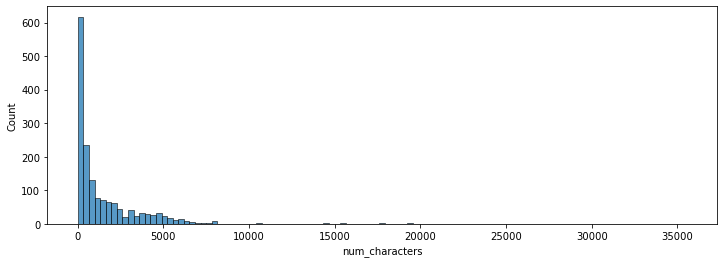

In [26]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.histplot(bd[bd['Class'] == 0]['num_characters'])


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

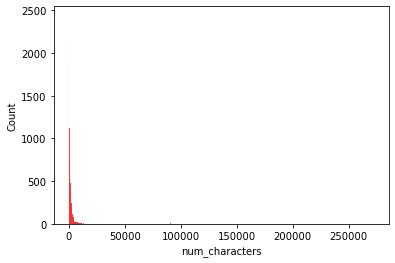

In [27]:
sns.histplot(bd[bd['Class'] == 1]['num_characters'],color='red')

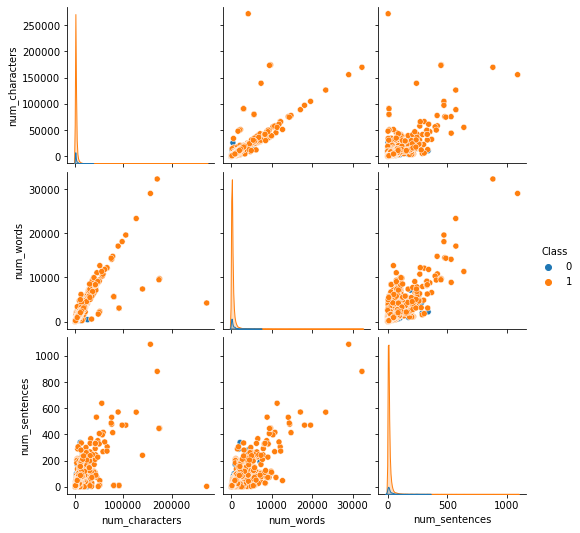

In [28]:
sns.pairplot(bd,hue='Class')

In [29]:
bd.corr()

,Class,num_characters,num_words,num_sentences
Class,1.000000,0.005366,-0.000765,-0.043509
num_characters,0.005366,1.000000,0.834615,0.691452
num_words,-0.000765,0.834615,1.000000,0.837702
num_sentences,-0.043509,0.691452,0.837702,1.000000


<AxesSubplot:>

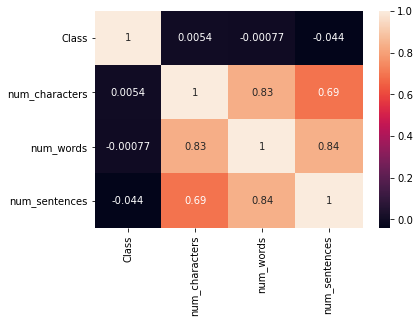

In [30]:
sns.heatmap(bd.corr(),annot=True)

In [31]:
def transform_text(content):
    content=content.lower()
    content=nltk.word_tokenize(content)
    
    y=[]
    for i in content:
        if i.isalnum():
            y.append(i)
            
    content = y[:]
    y.clear()
            
    for i in content:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    content = y[:]
    y.clear()
    
    for i in content:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [37]:
transform_text('The product recovery system was shut down on September 8th due to excessive \nproduction of water. This system was shut down pending the installation new \nrecovery pumps which would minimize production of water. The new pumps have \nbeen purchased and are on-site, however, in the time period since September \n8th, PSH has accumulated in only one of the three on-site recovery wells. In \nlight of this, installation of the new recovery pumps will be postponed until \nadditional recovery wells have been installed. ')

'product recoveri system shut septemb 8th due excess product water system shut pend instal new recoveri pump would minim product water new pump purchas howev time period sinc septemb 8th psh accumul one three recoveri well light instal new recoveri pump postpon addit recoveri well instal'

In [32]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('eating')

'eat'

In [35]:
bd['content'][300]

'The product recovery system was shut down on September 8th due to excessive \nproduction of water. This system was shut down pending the installation new \nrecovery pumps which would minimize production of water. The new pumps have \nbeen purchased and are on-site, however, in the time period since September \n8th, PSH has accumulated in only one of the three on-site recovery wells. In \nlight of this, installation of the new recovery pumps will be postponed until \nadditional recovery wells have been installed. '

In [36]:
bd['transformed_text'] = bd['content'].apply(transform_text)

In [38]:
bd.head()

,content,Class,num_characters,num_words,num_sentences,transformed_text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato excelr pm john ect cc...
1,fuck you,0,8,2,1,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentlemen follow champagn avail 70 approxim re...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshol john j lavorato excelr john ect cc subj...


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, random_state=1, background_color='white')

In [40]:
nonabuse_wc=wc.generate(bd[bd['Class']== 1]['transformed_text'].str.cat(sep=" "))

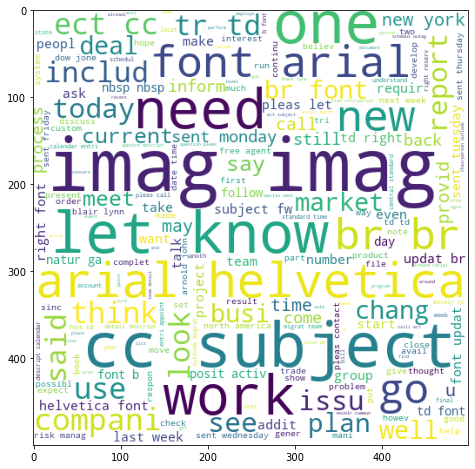

In [41]:
plt.figure(figsize=(12,8))
plt.imshow(nonabuse_wc)

In [42]:
abuse_wc=wc.generate(bd[bd['Class']== 0]['transformed_text'].str.cat(sep=" "))

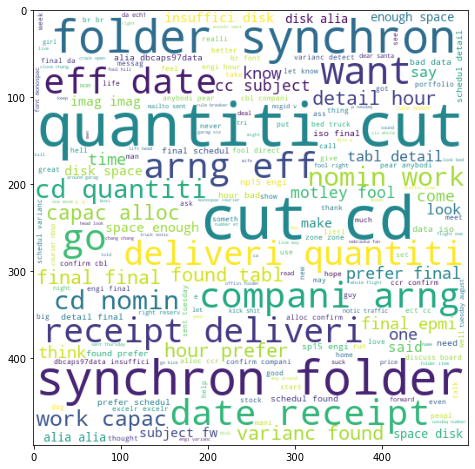

In [43]:
plt.figure(figsize=(12,8))
plt.imshow(abuse_wc)

In [44]:
nonabuse_corpus=[]
for msg in bd[bd['Class']== 1]['transformed_text'].tolist():
    for word in msg.split():
        nonabuse_corpus.append(word)

In [45]:
len(nonabuse_corpus)

3209347

In [46]:
from collections import Counter
pd.DataFrame(Counter(nonabuse_corpus).most_common(30))

,0,1
0,excelr,32932
1,http,25600
2,ect,18547
3,subject,17615
4,pleas,16877
5,time,14367
6,pm,14247
7,td,13921
8,font,13509
9,2001,12943


In [47]:
abuse_corpus=[]
for msg in bd[bd['Class']== 0]['transformed_text'].tolist():
    for word in msg.split():
        abuse_corpus.append(word)

In [48]:
len(abuse_corpus)

208413

In [49]:
pd.DataFrame(Counter(abuse_corpus).most_common(30))

,0,1
0,http,2325
1,excelr,1571
2,get,1374
3,final,1352
4,0,1331
5,go,1079
6,fool,1029
7,one,951
8,2,943
9,subject,908


In [50]:
af=bd

In [51]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(sampling_strategy='minority')
os = RandomOverSampler(sampling_strategy=0.5)
tex = pd.DataFrame(af['transformed_text'])
cl = pd.DataFrame(af['Class'])
tex_rs,cl_rs= os.fit_resample(tex,cl)

In [52]:
ema_re = pd.concat([tex_rs,cl_rs],axis=1)

In [53]:
ema_re.head()

,transformed_text,Class
0,eat shit john j lavorato excelr pm john ect cc...,0
1,fuck,0
2,gentlemen follow champagn avail 70 approxim re...,0
3,sorri taken long tri fend chick life sooooo ha...,0
4,asshol john j lavorato excelr john ect cc subj...,0


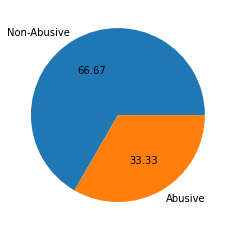

In [54]:
plt.pie(ema_re['Class'].value_counts(), labels=['Non-Abusive','Abusive'],autopct="%0.2f")
plt.show()

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=10000)

In [56]:
A_ema = tfidf.fit_transform(ema_re['transformed_text']).toarray()

In [57]:
A_ema.shape

(34521, 10000)

In [58]:
f_ema = ema_re['Class'].values

In [59]:
from sklearn.model_selection import train_test_split
A_train,A_test,f_train,f_test = train_test_split(A_ema,f_ema,test_size=0.2,random_state=2)

In [60]:
tfidf.vocabulary_

{'eat': 3035,
 'shit': 8141,
 'john': 4965,
 'lavorato': 5264,
 'excelr': 3378,
 'pm': 6945,
 'ect': 3066,
 'cc': 1803,
 'subject': 8677,
 'footbal': 3691,
 'bet': 1227,
 '200': 149,
 'phil': 6839,
 'indi': 4653,
 'det': 2698,
 'den': 2650,
 'jack': 4836,
 'fuck': 3819,
 'gentlemen': 3926,
 'follow': 3679,
 'champagn': 1858,
 'avail': 987,
 '70': 376,
 'approxim': 832,
 'retail': 7595,
 'price': 7082,
 'also': 693,
 'interest': 4742,
 'trade': 9176,
 'red': 7429,
 'wine': 9806,
 'deriv': 2677,
 'spec': 8423,
 'websit': 9701,
 'store': 8612,
 'temperatur': 8920,
 'control': 2264,
 'privat': 7106,
 'storag': 8611,
 'facil': 3452,
 'vintag': 9567,
 '1990': 134,
 'de': 2555,
 '110': 46,
 'piper': 6883,
 'reserv': 7569,
 '65': 362,
 '125': 70,
 'la': 5189,
 'grand': 4065,
 'dame': 2498,
 '100': 29,
 '85': 416,
 '1992': 136,
 '29': 218,
 'sorri': 8387,
 'taken': 8830,
 'long': 5470,
 'tri': 9225,
 'chick': 1924,
 'life': 5376,
 'sooooo': 8381,
 'hard': 4225,
 'sometim': 8369,
 'monkey': 6002

# MODEL BUILDING

# NAIVE BAYES 

In [111]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from time import time

In [112]:
# Creating empty lists to store model training time, model predicting time, model accuracy scores, model precision scores.
training_time = []
predicting_time = []
accuracy_scores = []
precision_scores = []

In [113]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [114]:
tt = time()
gnb.fit(A_train,f_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
pt = time()
f_pred1 = gnb.predict(A_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score',accuracy_score(f_test,f_pred1))
print('\nconfusion matrix',confusion_matrix(f_test,f_pred1))
print('\nprecision score',precision_score(f_test,f_pred1))
print(classification_report(f_test, f_pred1))
accuracy_scores.append(accuracy_score(f_test,f_pred1))
precision_scores.append(precision_score(f_test,f_pred1))


Training time: 18.075 s


Predicting time: 3.595 s


Accuracy Score 0.8837074583635047

confusion matrix [[2300    3]
 [ 800 3802]]

precision score 0.9992115637319317
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2303
           1       1.00      0.83      0.90      4602

    accuracy                           0.88      6905
   macro avg       0.87      0.91      0.88      6905
weighted avg       0.91      0.88      0.89      6905



In [115]:
tt = time()
mnb.fit(A_train,f_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
pt = time()
f_pred2 = mnb.predict(A_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score',accuracy_score(f_test,f_pred2))
print('\nconfusion matrix',confusion_matrix(f_test,f_pred2))
print('\nprecision score',precision_score(f_test,f_pred2))
print(classification_report(f_test, f_pred2))
accuracy_scores.append(accuracy_score(f_test,f_pred2))
precision_scores.append(precision_score(f_test,f_pred2))


Training time: 1.45 s


Predicting time: 0.094 s


Accuracy Score 0.9343953656770456

confusion matrix [[2029  274]
 [ 179 4423]]

precision score 0.9416648924845646
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2303
           1       0.94      0.96      0.95      4602

    accuracy                           0.93      6905
   macro avg       0.93      0.92      0.93      6905
weighted avg       0.93      0.93      0.93      6905



# SVM

In [116]:
from sklearn import svm
from sklearn.svm import SVC
tt = time()
SVM_model = svm.SVC(C=1.0, kernel='sigmoid', degree=3, gamma='auto')
SVM_model.fit(A_train,f_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
pt = time()
f_pred3 = SVM_model.predict(A_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score',accuracy_score(f_test,f_pred3))
print('\nconfusion matrix',confusion_matrix(f_test,f_pred3))
print('\nprecision score',precision_score(f_test,f_pred3))
print(classification_report(f_test, f_pred3))
accuracy_scores.append(accuracy_score(f_test,f_pred3))
precision_scores.append(precision_score(f_test,f_pred3))


Training time: 2572.242 s


Predicting time: 485.537 s


Accuracy Score 0.6664735698769008

confusion matrix [[   0 2303]
 [   0 4602]]

precision score 0.6664735698769008
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2303
           1       0.67      1.00      0.80      4602

    accuracy                           0.67      6905
   macro avg       0.33      0.50      0.40      6905
weighted avg       0.44      0.67      0.53      6905



C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-NEIGHBOUR

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [118]:
tt = time()
knc.fit(A_train,f_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
pt = time()
f_pred4 = knc.predict(A_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score',accuracy_score(f_test,f_pred3))
print('\nconfusion matrix',confusion_matrix(f_test,f_pred4))
print('\nprecision score',precision_score(f_test,f_pred4))
print(classification_report(f_test, f_pred4))
accuracy_scores.append(accuracy_score(f_test,f_pred4))
precision_scores.append(precision_score(f_test,f_pred4))


Training time: 3.291 s


Predicting time: 48.336 s


Accuracy Score 0.6664735698769008

confusion matrix [[2234   69]
 [  42 4560]]

precision score 0.9850939727802981
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2303
           1       0.99      0.99      0.99      4602

    accuracy                           0.98      6905
   macro avg       0.98      0.98      0.98      6905
weighted avg       0.98      0.98      0.98      6905



# RANDOM FOREST

In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
tt = time()
rfc.fit(A_train,f_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
pt = time()
f_pred5 = rfc.predict(A_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score',accuracy_score(f_test,f_pred5))
print('\nconfusion matrix',precision_score(f_test,f_pred5))
print('\nprecision score',confusion_matrix(f_test,f_pred5))
print(classification_report(f_test, f_pred5))
accuracy_scores.append(accuracy_score(f_test,f_pred5))
precision_scores.append(precision_score(f_test,f_pred5))


Training time: 64.783 s


Predicting time: 0.433 s


Accuracy Score 0.9958001448225923

confusion matrix 0.9982567008062759

precision score [[2295    8]
 [  21 4581]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2303
           1       1.00      1.00      1.00      4602

    accuracy                           1.00      6905
   macro avg       0.99      1.00      1.00      6905
weighted avg       1.00      1.00      1.00      6905



# DECISION TREE

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
tt = time()
dtc.fit(A_train,f_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
pt = time()
f_pred6 = dtc.predict(A_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score',accuracy_score(f_test,f_pred6))
print('\nconfusion matrix',confusion_matrix(f_test,f_pred6))
print('\nprecision score',precision_score(f_test,f_pred6))
print(classification_report(f_test, f_pred6))
accuracy_scores.append(accuracy_score(f_test,f_pred6))
precision_scores.append(precision_score(f_test,f_pred6))


Training time: 33.891 s


Predicting time: 0.156 s


Accuracy Score 0.7772628530050688

confusion matrix [[ 783 1520]
 [  18 4584]]

precision score 0.7509829619921363
              precision    recall  f1-score   support

           0       0.98      0.34      0.50      2303
           1       0.75      1.00      0.86      4602

    accuracy                           0.78      6905
   macro avg       0.86      0.67      0.68      6905
weighted avg       0.83      0.78      0.74      6905



# LOGISTIC REGRESSION

In [121]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1')
tt = time()
lr.fit(A_train,f_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
pt = time()
f_pred7 = lr.predict(A_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score',accuracy_score(f_test,f_pred7))
print('\nconfusion matrix',confusion_matrix(f_test,f_pred7))
print('\nprecision score',precision_score(f_test,f_pred7))
print(classification_report(f_test, f_pred7))
accuracy_scores.append(accuracy_score(f_test,f_pred7))
precision_scores.append(precision_score(f_test,f_pred7))


Training time: 1.382 s


Predicting time: 0.111 s


Accuracy Score 0.9808834178131789

confusion matrix [[2226   77]
 [  55 4547]]

precision score 0.9833477508650519
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2303
           1       0.98      0.99      0.99      4602

    accuracy                           0.98      6905
   macro avg       0.98      0.98      0.98      6905
weighted avg       0.98      0.98      0.98      6905



# NEURAL NETWORKS

In [122]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [123]:
def create_model():
    model_nn = Sequential()
    model_nn.add(Dense(10, input_dim=10000, kernel_initializer='uniform', activation='relu'))
    model_nn.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model_nn.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model_nn

model_nn = KerasClassifier(build_fn=create_model,verbose = 0, batch_size = 10, epochs = 100 )


In [124]:
tt = time()
model_nn.fit(A_train,f_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))


Training time: 286.928 s



In [125]:
pt = time()
f_pred8 = model_nn.predict(A_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score',accuracy_score(f_test,f_pred8))
print('\nconfusion matrix',confusion_matrix(f_test,f_pred8))
print('\nprecision score',precision_score(f_test,f_pred8))
print(classification_report(f_test, f_pred8))
accuracy_scores.append(accuracy_score(f_test,f_pred8))
precision_scores.append(precision_score(f_test,f_pred8))

C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Predicting time: 0.524 s


Accuracy Score 0.991020999275887

confusion matrix [[2295    8]
 [  54 4548]]

precision score 0.9982440737489026
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2303
           1       1.00      0.99      0.99      4602

    accuracy                           0.99      6905
   macro avg       0.99      0.99      0.99      6905
weighted avg       0.99      0.99      0.99      6905



In [127]:
algorithms = ['GNB','MNB','SVM','K-NEIGHBOURS','RANDOM FOREST','DECISION TREE','LOGISTIC REGRESSION','NEURAL NETWORKS']
#creating a dataframe to showcase all the model's performance metrices
performance_tab = pd.DataFrame({'Algorithm':algorithms,'Training Time':training_time,'Prediction Time':predicting_time,'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Prediction Time',ascending=True)
performance_tab

,Algorithm,Training Time,Prediction Time,Accuracy,Precision
1,MNB,1.450,0.094,0.934395,0.941665
6,LOGISTIC REGRESSION,1.382,0.111,0.980883,0.983348
5,DECISION TREE,33.891,0.156,0.777263,0.750983
4,RANDOM FOREST,64.783,0.433,0.995800,0.998257
7,NEURAL NETWORKS,286.928,0.524,0.991021,0.998244
0,GNB,18.075,3.595,0.883707,0.999212
3,K-NEIGHBOURS,3.291,48.336,0.983925,0.985094
2,SVM,2572.248,485.553,0.666474,0.666474


Since the prediction time of MNB and LOGISTIC REGRESSION IS ALMOST THE SAME,but the accuracy and precision is high of logistic regression than MNB.Hence we will go with logistic regression.

In [129]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(lr,open('model.pkl','wb'))